In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, metrics, model_selection
import random
import calendar
from datetime import date
import seaborn as sns

In [2]:
train_data = pd.read_csv('hw3_train.csv')
test_data = pd.read_csv('hw3_test.csv')
train_data.head()

,Date,Open Price,Close Price,High Price,Low Price,Volume
0,02-Jan-2009,902.99,931.80,934.73,899.35,4048270080
1,05-Jan-2009,929.17,927.45,936.63,919.53,5413910016
2,06-Jan-2009,931.17,934.70,943.85,927.28,5392620032
3,07-Jan-2009,927.45,906.65,927.45,902.37,4704940032
4,08-Jan-2009,905.73,909.73,910.00,896.81,4991549952


Process-- Checking the missing value

In [3]:
train_data.isna().sum()
test_data.isna().sum()

Date           0
Open Price     0
Close Price    0
High Price     0
Low Price      0
Volume         0
dtype: int64

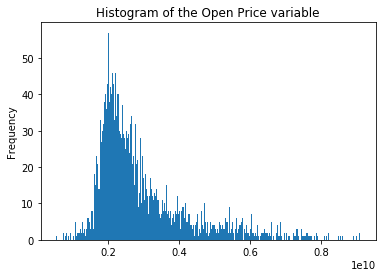

In [4]:
train_data['Volume'].plot.hist(
  bins = 300,
  title = "Histogram of the Open Price variable"
)

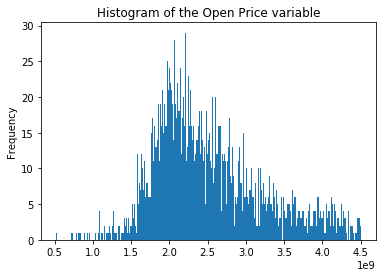

In [5]:
train_data=train_data.query('Volume<4500000000')
train_data['Volume'].plot.hist(
  bins = 300,
  title = "Histogram of the Open Price variable"
)

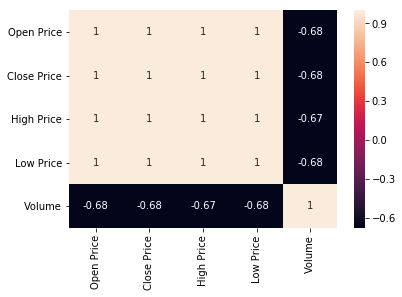

In [6]:
corr=train_data.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,annot=True)

In [7]:

train_data['next day raise']=train_data['Close Price']-train_data['Open Price']
test_data['next day raise']=test_data['Close Price']-test_data['Open Price']
train_data['Month']=train_data['Date']
test_data['Month']=test_data['Date']
#train_data['next day raise']=train_data['raise']
#test_data['next day raise']=test_data['raise']
test_data.head()

,Date,Open Price,Close Price,High Price,Low Price,Volume,next day raise,Month
0,02-Jan-2018,2683.73,2695.81,2695.89,2682.36,1846463232,12.08,02-Jan-2018
1,03-Jan-2018,2697.85,2713.06,2714.37,2697.77,2090595328,15.21,03-Jan-2018
2,04-Jan-2018,2719.31,2723.99,2729.29,2719.07,2100767744,4.68,04-Jan-2018
3,05-Jan-2018,2731.33,2743.15,2743.45,2727.92,1918869120,11.82,05-Jan-2018
4,08-Jan-2018,2742.67,2747.71,2748.51,2737.60,1894823936,5.04,08-Jan-2018


In [8]:
for i in range(train_data.shape[0]-1):
    train_data.iloc[i,7]=list(calendar.month_abbr).index(train_data.iloc[i,0][3:6])##將月份轉成數字
    train_data.iloc[i,6]=train_data.iloc[i+1,2]-train_data.iloc[i,2]
    if(train_data.iloc[i,6]>0):##將漲跌轉成01
        train_data.iloc[i,6]=int(1)
    else:
        train_data.iloc[i,6]=int(0)
train_data.iloc[train_data.shape[0]-1,6]=int(1)
train_data.iloc[train_data.shape[0]-1,7]=int(12)
train_data['next day raise']=train_data['next day raise'].astype(int)
train_data

,Date,Open Price,Close Price,High Price,Low Price,Volume,next day raise,Month
0,02-Jan-2009,902.99,931.80,934.73,899.35,4048270080,1,1
107,08-Jun-2009,938.12,939.14,946.33,926.44,4483429888,1,6
108,09-Jun-2009,940.35,942.43,946.92,936.15,4439949824,0,6
122,29-Jun-2009,919.86,927.23,927.99,916.18,4211760128,0,6
124,01-Jul-2009,920.82,923.33,931.92,920.82,3919399936,0,7
125,02-Jul-2009,921.24,896.42,921.24,896.42,3931000064,0,7
129,09-Jul-2009,881.28,882.68,887.86,878.45,4347169792,0,7
130,10-Jul-2009,880.03,879.13,883.57,872.81,3912079872,1,7
131,13-Jul-2009,879.57,901.05,901.05,875.32,4499440128,1,7
132,14-Jul-2009,900.77,905.84,905.84,896.50,4149029888,1,7


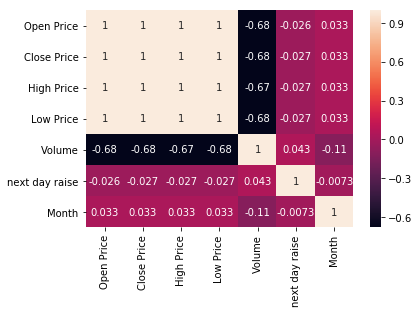

In [9]:
corr=train_data.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,annot=True)

In [58]:
for i in range(test_data.shape[0]-1):
    test_data.iloc[i,7]=list(calendar.month_abbr).index(test_data.iloc[i,0][3:6])##將月份轉成數字
    test_data.iloc[i,6]=test_data.iloc[i+1,2]-test_data.iloc[i,2]
    if(test_data.iloc[i,6]>0):##將漲跌轉成01
        test_data.iloc[i,6]=int(1)
    else:
        test_data.iloc[i,6]=int(0)
test_data.iloc[test_data.shape[0]-1,6]=int(1)
test_data.iloc[test_data.shape[0]-1,7]=int(12)
test_data['next day raise']=test_data['next day raise'].astype(int)
test_data.head(10)

,Date,Open Price,Close Price,High Price,Low Price,Volume,next day raise,Month
0,02-Jan-2018,2683.73,2695.81,2695.89,2682.36,1846463232,1,1
1,03-Jan-2018,2697.85,2713.06,2714.37,2697.77,2090595328,1,1
2,04-Jan-2018,2719.31,2723.99,2729.29,2719.07,2100767744,1,1
3,05-Jan-2018,2731.33,2743.15,2743.45,2727.92,1918869120,1,1
4,08-Jan-2018,2742.67,2747.71,2748.51,2737.60,1894823936,1,1
5,09-Jan-2018,2751.15,2751.29,2759.14,2747.86,1957263872,0,1
6,10-Jan-2018,2745.55,2748.23,2750.80,2736.06,2048867328,1,1
7,11-Jan-2018,2752.97,2767.56,2767.56,2752.78,1978592384,1,1
8,12-Jan-2018,2770.18,2786.24,2787.85,2769.64,2108422912,0,1
9,16-Jan-2018,2798.96,2776.42,2807.54,2768.64,2532135680,1,1


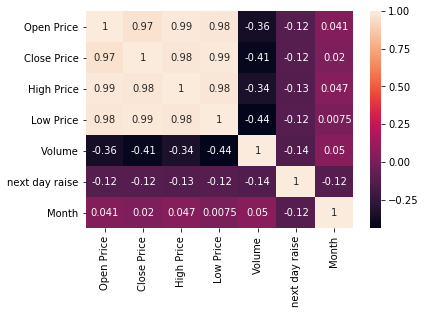

In [59]:
corr=test_data.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,annot=True)

In [60]:
result = pd.concat([ train_data,pd.get_dummies(train_data['Month'],prefix="M")], axis=1, join_axes=[train_data.index])
result
x_train=result.drop(["Month","Date","next day raise"],1)
x_train.head()
result1 = pd.concat([ test_data,pd.get_dummies(test_data['Month'],prefix="M")], axis=1, join_axes=[test_data.index])
x_test=result1.drop(["Month","Date","next day raise"],1)
x_test.head()
x_train.head(10)

,Open Price,Close Price,High Price,Low Price,Volume,M_1,M_2,M_3,M_4,M_5,M_6,M_7,M_8,M_9,M_10,M_11,M_12
0,902.99,931.80,934.73,899.35,4048270080,1,0,0,0,0,0,0,0,0,0,0,0
107,938.12,939.14,946.33,926.44,4483429888,0,0,0,0,0,1,0,0,0,0,0,0
108,940.35,942.43,946.92,936.15,4439949824,0,0,0,0,0,1,0,0,0,0,0,0
122,919.86,927.23,927.99,916.18,4211760128,0,0,0,0,0,1,0,0,0,0,0,0
124,920.82,923.33,931.92,920.82,3919399936,0,0,0,0,0,0,1,0,0,0,0,0
125,921.24,896.42,921.24,896.42,3931000064,0,0,0,0,0,0,1,0,0,0,0,0
129,881.28,882.68,887.86,878.45,4347169792,0,0,0,0,0,0,1,0,0,0,0,0
130,880.03,879.13,883.57,872.81,3912079872,0,0,0,0,0,0,1,0,0,0,0,0
131,879.57,901.05,901.05,875.32,4499440128,0,0,0,0,0,0,1,0,0,0,0,0
132,900.77,905.84,905.84,896.50,4149029888,0,0,0,0,0,0,1,0,0,0,0,0


In [61]:
x_train1=train_data[["Open Price",'Volume']]##"Open Price","Close Price",'High Price','Low Price','Volume'
y_train=train_data[['next day raise']]
x_test1=test_data[["Open Price",'Volume']]
y_test=test_data[['next day raise']]
y_train = np.array(y_train, dtype=int)
y_train=y_train.ravel()
y_test = np.array(y_test, dtype=int)
y_test=y_test.ravel()
x_train.head()


,Open Price,Close Price,High Price,Low Price,Volume,M_1,M_2,M_3,M_4,M_5,M_6,M_7,M_8,M_9,M_10,M_11,M_12
0,902.99,931.80,934.73,899.35,4048270080,1,0,0,0,0,0,0,0,0,0,0,0
107,938.12,939.14,946.33,926.44,4483429888,0,0,0,0,0,1,0,0,0,0,0,0
108,940.35,942.43,946.92,936.15,4439949824,0,0,0,0,0,1,0,0,0,0,0,0
122,919.86,927.23,927.99,916.18,4211760128,0,0,0,0,0,1,0,0,0,0,0,0
124,920.82,923.33,931.92,920.82,3919399936,0,0,0,0,0,0,1,0,0,0,0,0


In [62]:
from sklearn.preprocessing import StandardScaler 
sc=StandardScaler()
sc.fit(x_train)
x_train_nor=sc.transform(x_train)
x_test_nor=sc.transform(x_test) 
sc.fit(x_train1)
x_train_nor1=sc.transform(x_train1)
x_test_nor1=sc.transform(x_test1) 
x_train_nor

C:\ana\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ana\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\ana\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """
C:\ana\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ana\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys
C:\ana\lib\site-packages\ipykernel_launch

array([[-1.93706573, -1.8752571 , -1.88433094, ..., -0.31215181,
        -0.31410541, -0.31798949],
       [-1.85706554, -1.8585272 , -1.85790022, ..., -0.31215181,
        -0.31410541, -0.31798949],
       [-1.85198725, -1.85102838, -1.8565559 , ..., -0.31215181,
        -0.31410541, -0.31798949],
       ...,
       [ 2.1144326 ,  2.11534878,  2.10513464, ..., -0.31215181,
        -0.31410541,  3.14475798],
       [ 2.12354165,  2.12656283,  2.10973723, ..., -0.31215181,
        -0.31410541,  3.14475798],
       [ 2.13048729,  2.09481248,  2.11989938, ..., -0.31215181,
        -0.31410541,  3.14475798]])

In [63]:
from sklearn.linear_model  import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train_nor,y_train)

C:\ana\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [64]:
# 印出係數
print(lr.coef_)
# 印出截距
print(lr.intercept_ )

[[ 0.56865208 -0.52639124 -0.02335951 -0.01891073  0.07989675 -0.02602283
   0.0718781  -0.02064343  0.02791837 -0.02789978 -0.00573539 -0.005022
  -0.0241572  -0.0275135   0.04666069 -0.02557582  0.01846243]]
[0.18700412]


In [65]:
logstic_predict=np.round(lr.predict_proba(x_test_nor),4)
logstic_predict

array([[0.5004, 0.4996],
       [0.4947, 0.5053],
       [0.4911, 0.5089],
       [0.4983, 0.5017],
       [0.4969, 0.5031],
       [0.4937, 0.5063],
       [0.4918, 0.5082],
       [0.4976, 0.5024],
       [0.4945, 0.5055],
       [0.4707, 0.5293],
       [0.4879, 0.5121],
       [0.4853, 0.5147],
       [0.4844, 0.5156],
       [0.4974, 0.5026],
       [0.4895, 0.5105],
       [0.4791, 0.5209],
       [0.4821, 0.5179],
       [0.496 , 0.504 ],
       [0.4858, 0.5142],
       [0.4798, 0.5202],
       [0.4717, 0.5283],
       [0.3916, 0.6084],
       [0.3702, 0.6298],
       [0.3382, 0.6618],
       [0.3754, 0.6246],
       [0.3784, 0.6216],
       [0.3401, 0.6599],
       [0.3629, 0.6371],
       [0.3911, 0.6089],
       [0.4054, 0.5946],
       [0.4058, 0.5942],
       [0.3999, 0.6001],
       [0.3982, 0.6018],
       [0.3969, 0.6031],
       [0.3911, 0.6089],
       [0.3974, 0.6026],
       [0.4142, 0.5858],
       [0.4054, 0.5946],
       [0.3815, 0.6185],
       [0.3751, 0.6249],


In [66]:
from sklearn.metrics import confusion_matrix
cnf=confusion_matrix(y_test,lr.predict(x_test_nor))
print('混淆矩陣: ',cnf)

混淆矩陣:  [[ 10 110]
 [ 14 118]]


In [67]:
import itertools
target_name=['no','yes'] #是否漲股

In [68]:
#plot confusion matrix 官網提供

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 10 110]
 [ 14 118]]


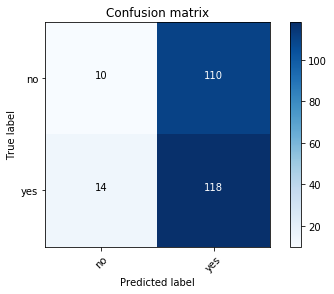

In [69]:
plot_confusion_matrix(cnf,target_name)

In [52]:
Accuracy=(cnf[0,0]+cnf[1,1])/(cnf[0,0]+cnf[1,0]+cnf[0,1]+cnf[1,1])
Accuracy

0.5079365079365079

In [53]:
from sklearn.svm import SVC

In [54]:
from sklearn.metrics import accuracy_score

# Custom kernel function
#def my_kernel(X, Y):
    #return np.dot(X, Y.T)
  
penalty = 0.05

svm = SVC(C=penalty, kernel="linear", probability=True)
svm.fit(x_train_nor, y_train)
acc_rate = accuracy_score(y_test, svm.predict(x_test_nor)) * 100
print("Penalty = %.2f, Accuracy = %.6f %%" % (penalty, acc_rate))

Penalty = 0.05, Accuracy = 52.380952 %


In [25]:
import tensorflow as tf
from tqdm import tqdm
from keras import models, layers, optimizers, regularizers

Using TensorFlow backend.


In [26]:

hidden_units = 10    # how many neurons in the hidden layer
activation = 'relu'  # activation function for hidden layer
l2 = 0.001           # regularization - how much we penalize large parameter values
learning_rate = 0.1  # how big our steps are in gradient descent
epochs = 20          # how many epochs to train for
batch_size = 32      # how many samples to use for each gradient descent update

In [27]:

# create a sequential model
model = models.Sequential()

# add the hidden layer
model.add(layers.Dense(input_dim=17,
                       units=hidden_units, 
                       activation=activation))

# add the output layer
model.add(layers.Dense(input_dim=hidden_units,
                       units=1,
                       activation='sigmoid'))

# define our loss function and optimizer
model.compile(loss='binary_crossentropy',
              # Adam is a kind of gradient descent
              optimizer=optimizers.Adam(lr=learning_rate),
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [28]:

class_weight = {
    0: 1.,
    1: 5/15
}

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
1971/1971 [==============================] - ETA: 30s - loss: 0.9670 - acc: 0.40 - ETA: 0s - loss: 0.4342 - acc: 0.4635 - 1s 303us/step - loss: 0.4215 - acc: 0.4510
Epoch 2/10
1971/1971 [==============================] - ETA: 0s - loss: 0.3905 - acc: 0.500 - ETA: 0s - loss: 0.3875 - acc: 0.435 - 0s 42us/step - loss: 0.3862 - acc: 0.4546
Epoch 3/10
1971/1971 [==============================] - ETA: 0s - loss: 0.4344 - acc: 0.375 - ETA: 0s - loss: 0.3897 - acc: 0.443 - ETA: 0s - loss: 0.3876 - acc: 0.459 - 0s 55us/step - loss: 0.3875 - acc: 0.4607
Epoch 4/10
1971/1971 [==============================] - ETA: 0s - loss: 0.3766 - acc: 0.437 - ETA: 0s - loss: 0.3905 - acc: 0.463 - 0s 42us/step - loss: 0.3888 - acc: 0.4515
Epoch 5/10
1971/1971 [==============================] - ETA: 0s - loss: 0.3837 - acc: 0.531 - ETA: 0s - loss: 0.3842 - acc: 0.441 - 0s 44us/step - loss: 0.3839 - acc: 0.4546
Epoch 6/10
1971/1971 [====================

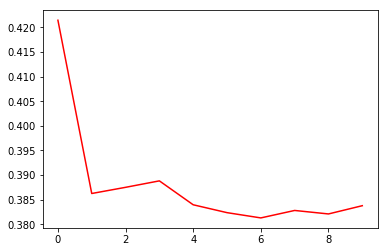

In [29]:
# train the parameters
history = model.fit(x_train_nor, y_train, epochs=10, batch_size=batch_size, class_weight=class_weight)

# evaluate accuracy
train_acc = model.evaluate(x_train_nor, y_train, batch_size=32)[1]
test_acc = model.evaluate(x_test_nor, y_test, batch_size=32)[1]
print('Training accuracy: %s' % train_acc)
print('Testing accuracy: %s' % test_acc)

losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()

In [30]:
def train_and_evaluate(model, x_train_nor, y_train, x_test_nor, y_test, n=20):
    train_accs = []
    test_accs = []
    with tqdm(total=n) as progress_bar:
        for _ in range(n):
            model.fit(
                x_train_nor, 
                y_train, 
                epochs=epochs, 
                batch_size=batch_size, 
                class_weight=class_weight, 
                verbose=False)
            train_accs.append(model.evaluate(x_train_nor, y_train, batch_size=32, verbose=False)[1])
            test_accs.append(model.evaluate(x_test_nor, y_test, batch_size=32, verbose=False)[1])
            progress_bar.update()
    print('Avgerage Training Accuracy: %s' % np.average(train_accs))
    print('Avgerage Testing Accuracy: %s' % np.average(test_accs))
    return train_accs, test_accs

In [31]:
_, test_accs = train_and_evaluate(model, x_train_nor, y_train, x_test_nor, y_test)

100%|██████████████████████████████████████████| 20/20 [00:27<00:00,  1.28s/it]


Avgerage Training Accuracy: 0.4535768646416115
Avgerage Testing Accuracy: 0.4761904742982653
